In [1]:
# %reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline
# %config InlineBackend.figur_format = 'retina'

In [2]:
np.random.seed(seed = 1) #난수를 고정
W = np.array([3./ 4. , 1.0 , -4./ 5.])
N = 50
dim = 2
K = 2
scale = 1;
T = np.zeros((N ,K),dtype = np.uint8)
X = scale*np.random.rand(N, dim)
print(X.shape)
print(T.shape)

(50, 2)
(50, 2)


In [3]:
for n in range(N):
    for K in range(K):
        if W[0]*X[n, 0]+ W[1]*X[n, 1] + W[2] > 0:
            T[n,1] = 1
        else:
            T[n,0] = 1
print(X[:5 , :])
print(T[:5 , :])

[[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816734e-01]]
[[0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]]


In [4]:
def show_data(x,t):
    c = [[0, 0, 0], [1, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1], linestyle = 'none', marker = 'o', color = c[k] )
        plt.grid(True)
        plt.show()
        
plt.figure(figsize = (3,3))
show_data(X, T)


<Figure size 216x216 with 0 Axes>

In [5]:
def logistic2(x0 ,x1 , w):
    y= 1 / (1 + np.exp(-(w[0] * x0 * w[1] * x1 + w[2])))
    return y

In [6]:
def cee_logistic2(w ,x ,t):
    X_n = x.shape[0]
    y = logistic2(x[: ,0], x[: ,1], w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) + (1 - t[n, 0]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee

# test ---
_W = [-1., -1., -1.]
cee_logistic2(_W, X, T)

0.40773879392845963

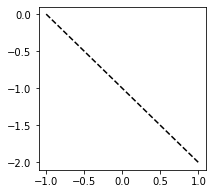

In [7]:
def show_line(W):
    xn = 50
    X_range0 = [-1,1]
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = -(W[0]/W[1])*x0 - W[2]/W[1]
    plt.plot(x0,x1, '--k')
    
#test ---
plt.figure(figsize = (3,3))
_W = [-1., -1., -1.]
show_line(_W)

In [8]:
def fit_logistic(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args = (x ,t), method="CG")
    return res.x

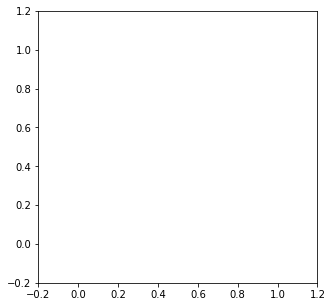

In [9]:
#메인---------------------
plt.figure(1, figsize = (5, 5))
w_init = [1,1,-1]
_W = fit_logistic(w_init, X, T)

show_data(X ,T)
show_line(_W)
plt.xlim(-.2, 1.2)
plt.ylim(-.2, 1.2)
plt.show()